In [1]:
# importing libraries

import warnings 
warnings.simplefilter('ignore')

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [2]:
# Loading Data frame
df = pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape # shape 

(9240, 37)

In [5]:
df.info() # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# target variable
df['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [8]:
#checking for the number of null values in each column 

df.isnull().sum(axis = 0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
round((df.isnull().sum(axis = 0)/ len(df.index))*100 , 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Dropping the columns 'Asymmetrique Activity Index' and 'Asymmetrique Profile Index' as there is score column for both

df = df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index'], axis = 1)

In [11]:
# checking Asymmetrique Activity Score 
df['Asymmetrique Activity Score'].value_counts()


14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [12]:
df['Asymmetrique Activity Score'] = df['Asymmetrique Activity Score'].fillna('Unknown')
print(df['Asymmetrique Activity Score'].value_counts())
print('\n')
print('Number of null values = ',sum(df['Asymmetrique Activity Score'].isnull()))

Unknown    4218
14.0       1771
15.0       1293
13.0        775
16.0        467
17.0        349
12.0        196
11.0         95
10.0         57
9.0           9
18.0          5
8.0           4
7.0           1
Name: Asymmetrique Activity Score, dtype: int64


Number of null values =  0


In [13]:
df['Asymmetrique Profile Score'] = df['Asymmetrique Profile Score'].fillna('Unknown')
df['Asymmetrique Profile Score'].value_counts()

Unknown    4218
15.0       1759
18.0       1071
16.0        599
17.0        579
20.0        308
19.0        245
14.0        226
13.0        204
12.0         22
11.0          9
Name: Asymmetrique Profile Score, dtype: int64

In [14]:
#Lead Quality
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [15]:
sum(df['Lead Quality'].isnull())

4767

In [16]:
df['Lead Quality'].fillna("Unknown", inplace = True)
df['Lead Quality'].value_counts()

Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [17]:
# Tags column
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [18]:
sum(df['Tags'].isnull())

3353

In [19]:
df['Tags'] = df['Tags'].fillna('Unknown')
df['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [20]:
sum(df['Tags'].isnull())

0

In [21]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [22]:
# MOre than 90% values are India hence replacing remailning countries to Foreign Country
df['Country'] = df['Country'].apply(lambda x: 'India' if x=='India' else 'Foreign Country')
df['Country'].value_counts()

India              6492
Foreign Country    2748
Name: Country, dtype: int64

In [23]:
# Total visits column
df['TotalVisits'].value_counts() 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

<AxesSubplot:>

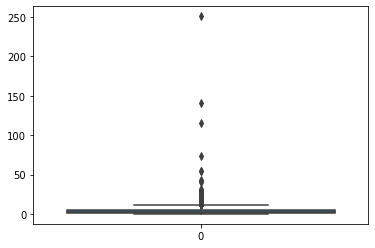

In [24]:
sns.boxplot(data=df.TotalVisits)

In [25]:
#Since the above column has lot of outliers we will impute with the median value
df['TotalVisits'].median() 

3.0

In [26]:
df['TotalVisits'].replace(np.NaN, df['TotalVisits'].median(), inplace =True)

In [27]:
# Page Views Per Visit column null values are similarly imputed using the median values

df['Page Views Per Visit'].replace(np.NaN, df['Page Views Per Visit'].median(), inplace =True)

In [28]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [29]:
df['Last Activity'].isnull().sum()

103

In [30]:
# Replacing Null values with "Unknown"
df['Last Activity'].fillna("Unknown", inplace = True)
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [31]:
df['Last Activity'].isnull().sum()

0

In [32]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [33]:
df['Specialization'].isnull().sum()

1438

In [34]:
#replacing Select variables with Unknown 
df['Specialization'].replace('Select', 'Unknown', inplace =True)
df['Specialization'].value_counts()

Unknown                              1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [35]:
#replacing Null with Unknown
df['Specialization'].fillna("Unknown", inplace = True)
df['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [36]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

dropping How did you hear about X Education column as most of the colums are Select

In [37]:
df = df.drop('How did you hear about X Education', axis=1)

In [38]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
df['What is your current occupation'].isnull().sum()

2690

In [40]:
#Replcaing Null with Unknown
df['What is your current occupation'].fillna("Unknown", inplace = True)
df['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [41]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
df['What matters most to you in choosing a course'].isnull().sum()

2709

Here Better Career Prospects occupied major columns and 35& are null values and other columns doesn't gave much info so we are dropping the column

In [43]:
# Dropping 'What matters most to you in choosing a course' col 
df = df.drop('What matters most to you in choosing a course', axis = 1)

In [44]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [45]:
df['Lead Profile'].isnull().sum()

2709

In [46]:
# Replacing Unknown with Select
df['Lead Profile'].replace('Select', 'Unknown', inplace =True)
df['Lead Profile'].value_counts()

Unknown                        4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [47]:
#Replacing Null with Unknown
df['Lead Profile'].fillna("Unknown", inplace = True)
df['Lead Profile'].value_counts()

Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [48]:
# City column
df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [49]:
df['City'].isnull().sum()

1420

In [50]:
# Replacing Select with Unknown 
df['City'].replace('Select', 'Unknown', inplace =True)
df['City'].value_counts()

Mumbai                         3222
Unknown                        2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [51]:
#Replacing Null with Unknown
df['City'].fillna("Unknown", inplace = True)
df['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [52]:
# re-checking for the percentage of null values in each column 

round((df.isnull().sum(axis = 0)/ len(df.index))*100 , 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [53]:
df.shape

(9240, 33)

In [54]:
# removing all the rows with null values

df = df.dropna()

In [55]:
df.shape

(9204, 33)

In [56]:
# checking for the percentage of null values in each column 

round((df.isnull().sum(axis = 0)/ len(df.index))*100 , 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

## Data is clean

# Exploratory Data Analysis

In [57]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.374619730551935

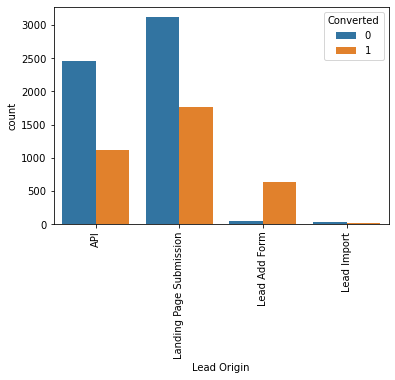

In [58]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Inference

    API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
    Lead Add Form has more than 90% conversion rate but count of lead are not very high.
    Lead Import are very less in count.
    
    
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

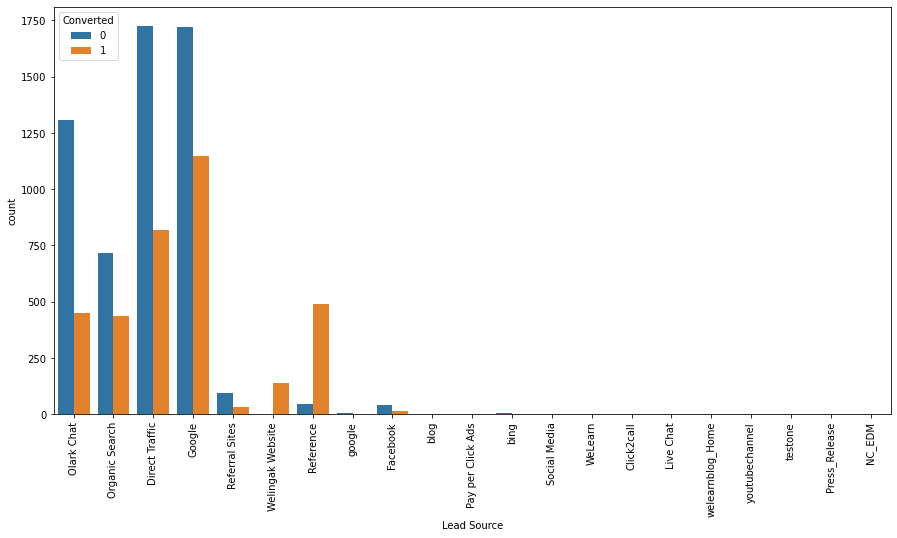

In [59]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [60]:
# Replacing Values for Better Understanding
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

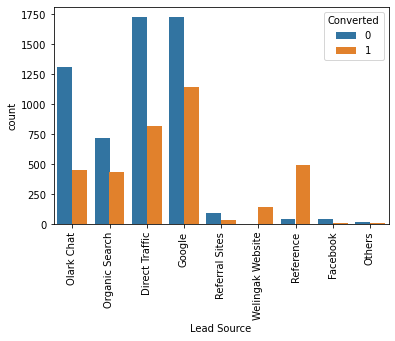

In [61]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Inference

    Google and Direct traffic generates maximum number of leads.
    Conversion Rate of reference leads and leads through welingak website is high.
    
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

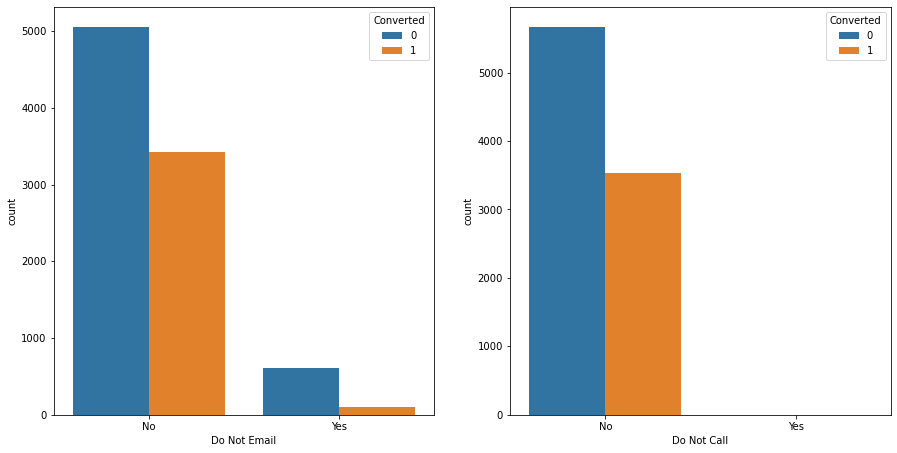

In [62]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])
plt.show()

In [63]:
df['TotalVisits'].describe()

count    9204.000000
mean        3.449587
std         4.824662
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [64]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9204.000000
mean        3.449587
std         4.824662
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

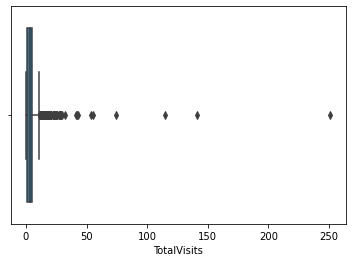

In [65]:
sns.boxplot(df['TotalVisits'])

### We will cap the outliers to 95% value for analysis.

In [66]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

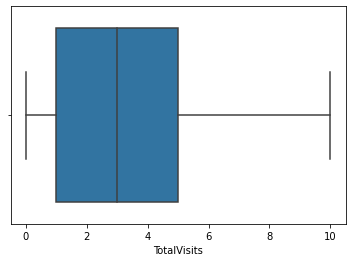

In [67]:
sns.boxplot(df['TotalVisits'])
plt.show()

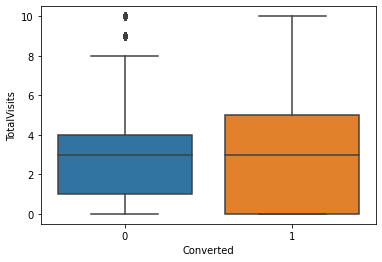

In [68]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Inference

    Median for converted and not converted leads are the same.
    
    Nothng conclusive can be said on the basis of Total Visits.

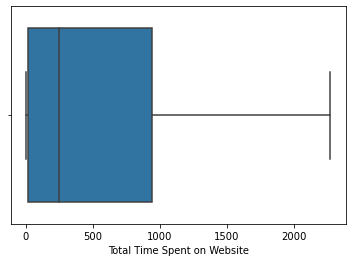

In [69]:
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

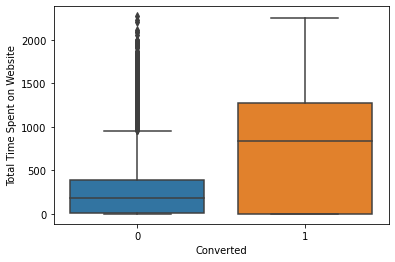

In [70]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

Inference

    Leads spending more time on the weblise are more likely to be converted.
    Website should be made more engaging to make leads spend more time.

In [71]:
df['Page Views Per Visit'].describe()

count    9204.000000
mean        2.364923
std         2.145999
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

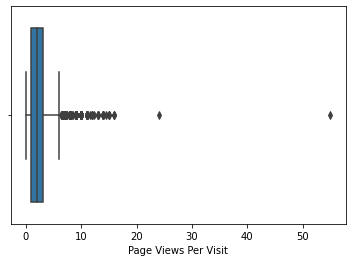

In [72]:
sns.boxplot(df['Page Views Per Visit'])

#### capping the outliers to 95% value for analysis.

In [73]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

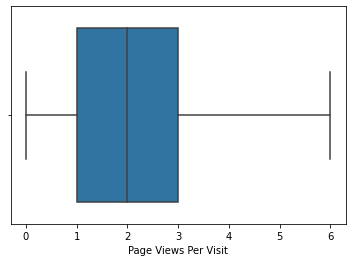

In [74]:
sns.boxplot(df['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

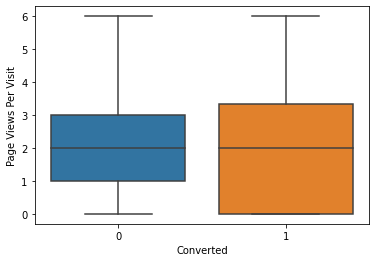

In [75]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

Inference

    Median for converted and unconverted leads is the same.
    Nothing can be said specifically for lead conversion from Page Views Per Visit

In [76]:
df['Last Activity'].describe()

count             9204
unique              18
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

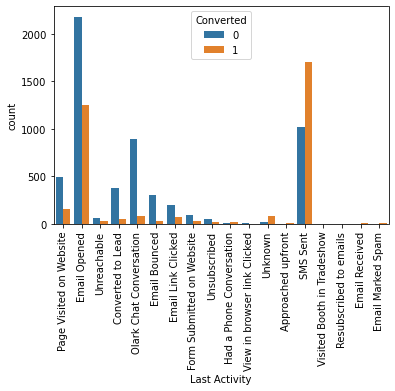

In [77]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

Infrence :
    
    Email Opened and SMS Sent was the Last activity for Many leads

In [78]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

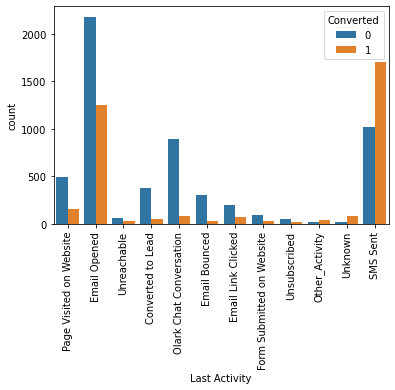

In [79]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation=90)
plt.show()

Inference

    Email opened is their last activity.
    Conversion rate for leads with last activity as SMS Sent is almost 60%

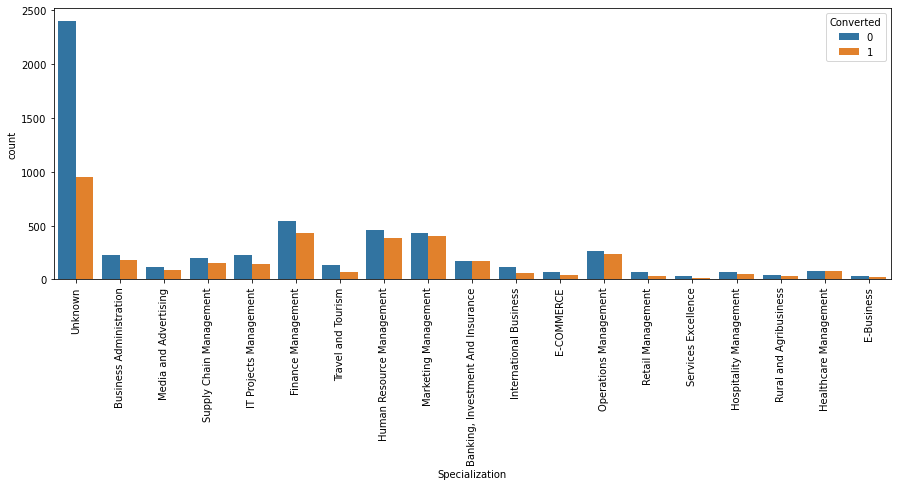

In [80]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Inference

    Finance Management, Human resource Management, Markeying Management Specialization with high conversion rate.

In [81]:
df['What is your current occupation'].value_counts()

Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [82]:
df['What is your current occupation'] = df['What is your current occupation'].replace(['Other','Unknown'], 'Other_Occupation')
df['What is your current occupation'].value_counts()

Unemployed              5567
Other_Occupation        2706
Working Professional     704
Student                  209
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

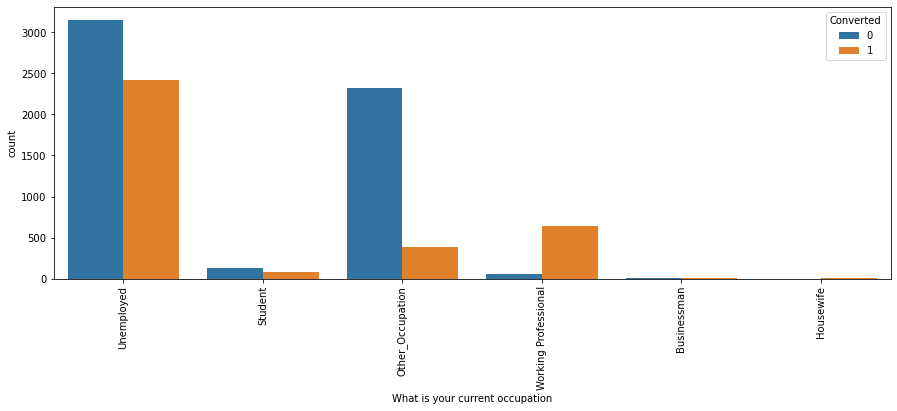

In [83]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Infrence:
    
    Unemployed has more convention rate whereas Housewife and Bussinessman are least

In [84]:
df.Tags.value_counts()

Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [85]:
df.Tags.describe()

count        9204
unique         27
top       Unknown
freq         3342
Name: Tags, dtype: object

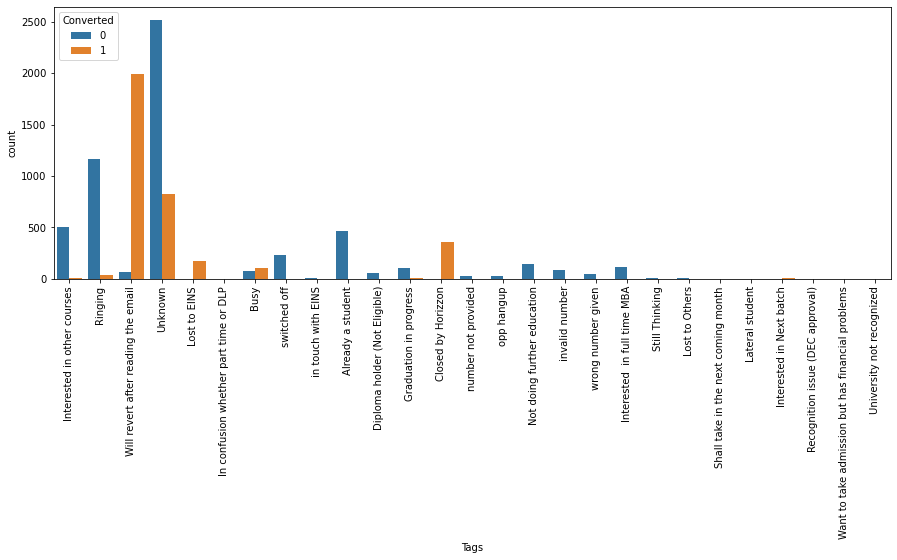

In [86]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Infrence:
    
    'Will revert after reading the email' is the most received status of the lead

In [87]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

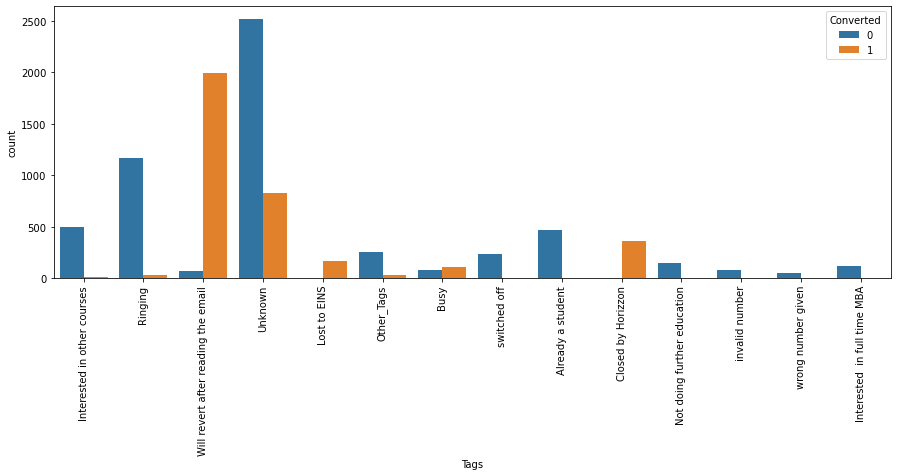

In [88]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [89]:
df['Lead Quality'].describe()

count        9204
unique          6
top       Unknown
freq         4753
Name: Lead Quality, dtype: object

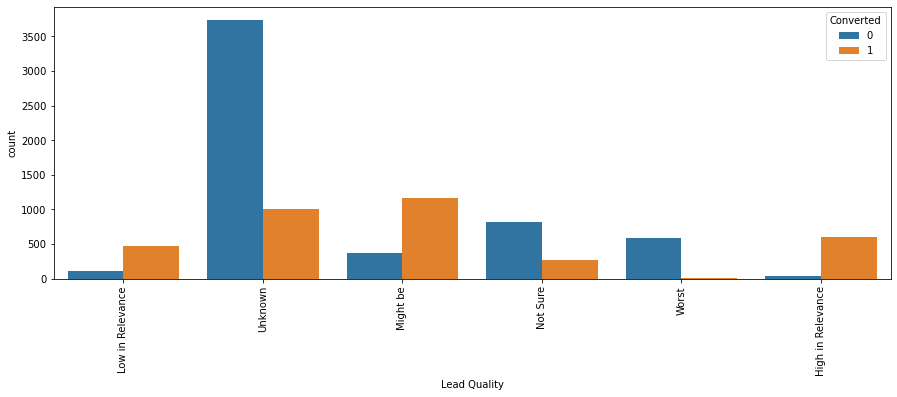

In [90]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Infrence 
    
    1. Might be category has more chances for convention

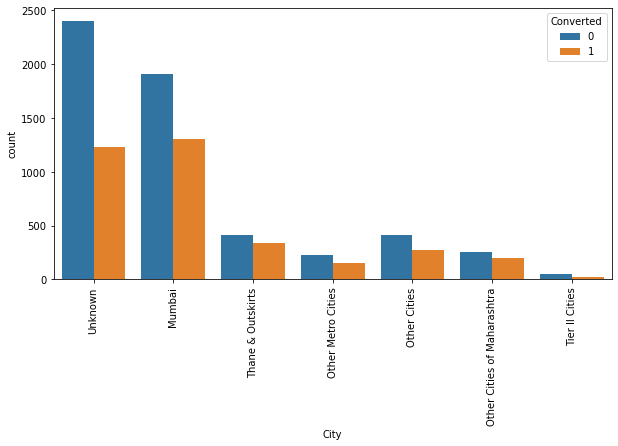

In [91]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Mumbai City has more changes for convention than other

In [92]:
df['Last Notable Activity'].describe()

count         9204
unique          16
top       Modified
freq          3397
Name: Last Notable Activity, dtype: object

In [93]:
df['Last Notable Activity'].value_counts()

Modified                        3397
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

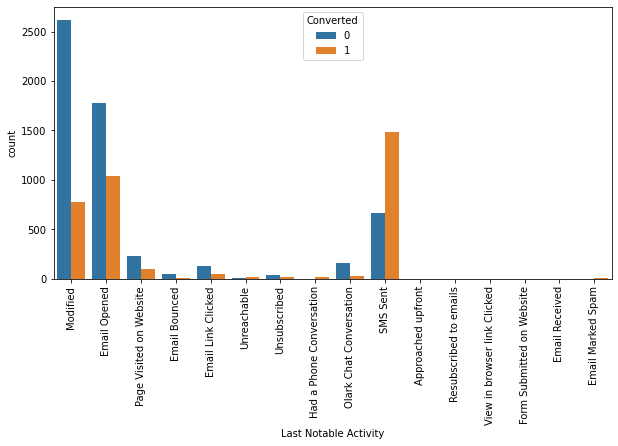

In [94]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [95]:
#df = df.drop(['Lead Number','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
#           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
#           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [96]:
for col in df.columns:
    print(col, ':', df[col].nunique())
    print('\n')

Prospect ID : 9204


Lead Number : 9204


Lead Origin : 4


Lead Source : 9


Do Not Email : 2


Do Not Call : 2


Converted : 2


TotalVisits : 11


Total Time Spent on Website : 1730


Page Views Per Visit : 91


Last Activity : 12


Country : 2


Specialization : 19


What is your current occupation : 6


Search : 2


Magazine : 1


Newspaper Article : 2


X Education Forums : 2


Newspaper : 2


Digital Advertisement : 2


Through Recommendations : 2


Receive More Updates About Our Courses : 1


Tags : 14


Lead Quality : 6


Update me on Supply Chain Content : 1


Get updates on DM Content : 1


Lead Profile : 6


City : 7


Asymmetrique Activity Score : 13


Asymmetrique Profile Score : 11


I agree to pay the amount through cheque : 1


A free copy of Mastering The Interview : 2


Last Notable Activity : 16




In [97]:
# Prospect ID and Lead Number are the same thing so having both the columsn is redundant so we will drop the Prospect ID column

df = df.drop('Prospect ID',axis=1)

# Also a lot of the columns have just one unique value so they are of no use as they do not provide any information so dropping them as well
df = df.drop(['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content','Get updates on DM Content',
                    'I agree to pay the amount through cheque'], axis=1)

In [98]:
df.shape

(9204, 27)

In [99]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [100]:
df['What is your current occupation'].value_counts()

Unemployed              5567
Other_Occupation        2706
Working Professional     704
Student                  209
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

# Data Preparation

In [101]:
# Mapping with Binary Values
def mapping(x):
    return x.map({'Yes':1, 'No':0})

In [102]:
col_list = ['Search',
            'Do Not Email',
            'Do Not Call',
            'Newspaper Article',
            'X Education Forums',
            'Newspaper',
            'Digital Advertisement',
            'Through Recommendations',
            'A free copy of Mastering The Interview']

In [103]:
df[col_list] = df[col_list].apply(mapping)

In [104]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,Unknown,Unknown,15.0,15.0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Unknown,Unknown,Unknown,15.0,15.0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,14.0,20.0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,Unknown,Mumbai,13.0,17.0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,Unknown,Mumbai,15.0,18.0,0,Modified


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9204 non-null   int64  
 1   Lead Origin                             9204 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9204 non-null   int64  
 4   Do Not Call                             9204 non-null   int64  
 5   Converted                               9204 non-null   int64  
 6   TotalVisits                             9204 non-null   float64
 7   Total Time Spent on Website             9204 non-null   int64  
 8   Page Views Per Visit                    9204 non-null   float64
 9   Last Activity                           9204 non-null   object 
 10  Country                                 9204 non-null   obje

In [106]:
# creating dummy variables for some of the other categorical columns 
df = pd.get_dummies(df, columns=['Lead Origin', 'Lead Source', 'Country', 'Last Notable Activity'], drop_first=True)

In [107]:
df['What is your current occupation'].value_counts()

Unemployed              5567
Other_Occupation        2706
Working Professional     704
Student                  209
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### For categorical variables with multiple levels, create dummy features 

In [108]:
# Creating dummmy variables for the rest of the columns and dropping the level called 'Unknown'


# Creating dummy variables for the variable 'Asymmetrique Activity Score'
dummy = pd.get_dummies(df['Asymmetrique Activity Score'], prefix='Asymmetrique Activity Score')
final_dummy = dummy.drop(['Asymmetrique Activity Score_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'Asymmetrique Profile Score'
dummy = pd.get_dummies(df['Asymmetrique Profile Score'], prefix='Asymmetrique Profile Score')
final_dummy = dummy.drop(['Asymmetrique Profile Score_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'Last Activity'
dummy = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
final_dummy = dummy.drop(['Last Activity_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
dummy = pd.get_dummies(df['What is your current occupation'], prefix='What is your current occupation')
final_dummy = dummy.drop(['What is your current occupation_Unemployed'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'Lead Profile'
dummy = pd.get_dummies(df['Lead Profile'], prefix='Lead Profile')
final_dummy = dummy.drop(['Lead Profile_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'Specialization'
dummy = pd.get_dummies(df['Specialization'], prefix='Specialization')
final_dummy = dummy.drop(['Specialization_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'City'
dummy = pd.get_dummies(df['City'], prefix='City')
final_dummy = dummy.drop(['City_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'City'
dummy = pd.get_dummies(df['Lead Quality'], prefix='Lead Quality')
final_dummy = dummy.drop(['Lead Quality_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

# Creating dummy variables for the variable 'City'
dummy = pd.get_dummies(df['Tags'], prefix='Tags')
final_dummy = dummy.drop(['Tags_Unknown'], 1)
df = pd.concat([df,final_dummy], axis=1)

In [109]:
df.shape

(9204, 135)

#### Dropping the columns for which we have created dummy variables

In [110]:
df = df.drop(['Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Last Activity', 
                    'What is your current occupation', 'Lead Profile','Specialization','City','Tags'],axis=1)

In [111]:
df.shape

(9204, 126)

In [112]:
# checking for outliers in the continuous variables

numerical = df[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]

In [113]:
numerical.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000
mean,3.189157,489.005541,2.262187
std,2.761002,547.980340,1.778574
min,0.000000,0.000000,0.000000
25%,1.000000,14.000000,1.000000
50%,3.000000,250.000000,2.000000
75%,5.000000,938.000000,3.000000
max,10.000000,2272.000000,6.000000


<AxesSubplot:xlabel='Page Views Per Visit'>

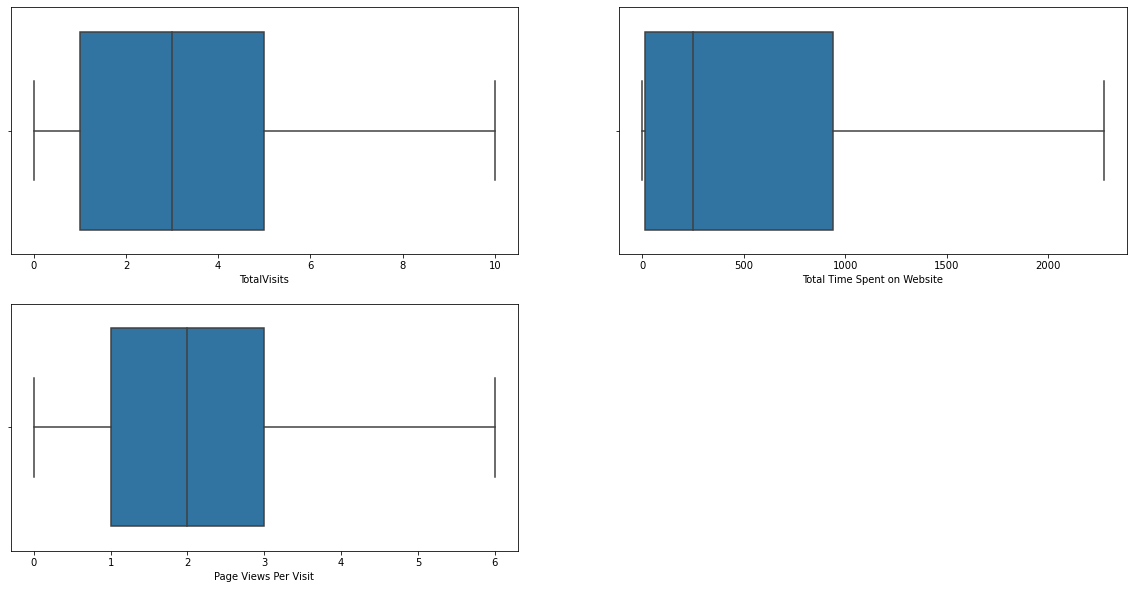

In [114]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(numerical['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(numerical['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(numerical['Page Views Per Visit'])

In [115]:
df.shape

(9204, 126)

In [116]:
# Putting feature variable to X
X = df.drop(['Lead Number','Converted'], axis=1)


In [117]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [118]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [119]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
5310,0,0,0.278371,-0.721902,0.968356,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2181,0,0,1.721643,-0.429014,2.092469,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8215,0,0,-1.164901,-0.905639,-1.279869,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8887,0,0,-0.443265,-0.487228,-0.155756,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7920,0,0,0.278371,-0.547261,0.968356,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# Checking the Churn Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.374619730551935

#### We have  38.4 % conversion

# Model Building

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                          120
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -944.88
Date:                Tue, 03 Jan 2023   Deviance:                       1889.8
Time:                        19:33:42   Pearson chi2:                 2.07e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6494
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.2359   1.32e+05      0.000      1.000   -2.59e+05    2.59e+05
Do Not Email                                            -0.9913      0.354     -2.800      0.005      -1.685      -0.297
Do Not Call                                             17.2758   9.93e+04      0.000      1.000   -1.95e+05    1.95e+05
TotalVisits                                              0.3245      0.104      3.125      0.002       0.121       0.528
Total Time Spent on Website                              1.2068      0.076     15.953      0.000       1.059       1.355
Page Views Per Visit                                    -0.2546      0.115     -2.216      0.027      -0.480      -0.029
Search                                                   1.5880      1.229      1.292      0.196      -0.821       3.997
Newspaper Article                                       21.4812   2.27e+05   9.44e-05      1.000   -4.46e+05    4.46e+05
X Education Forums                                     -43.9602   2.72e+05     -0.000      1.000   -5.34e+05    5.34e+05
Newspaper                                              -23.2864   1.36e+05     -0.000      1.000   -2.67e+05    2.67e+05
Digital Advertisement                                   -1.6051      7.477     -0.215      0.830     -16.260      13.050
Through Recommendations                                  0.0848      4.871      0.017      0.986      -9.462       9.632
A free copy of Mastering The Interview                  -0.0948      0.210     -0.451      0.652      -0.507       0.317
Lead Origin_Landing Page Submission                     -0.5194      0.309     -1.680      0.093      -1.125       0.086
Lead Origin_Lead Add Form                               -1.9399      1.991     -0.974      0.330      -5.842       1.962
Lead Origin_Lead Import                                 24.8466   1.67e+05      0.000      1.000   -3.28e+05    3.28e+05
Lead Source_Facebook                                   -25.6799   1.67e+05     -0.000      1.000   -3.28e+05    3.28e+05
Lead Source_Google                                       0.0657      0.217      0.303      0.762      -0.359       0.491
Lead Source_Olark Chat                                   0.5311      0.373      1.425      0.154      -0.199       1.262
Lead Source_Organic Search                              -0.1321      0.241     -0.547      0.584      -0.605       0.341
Lead Source_Others                                       1.0121      1.232      0.821      0.412      -1.403       3.428
Lead Source_Reference                                    1.9798      2.036      0.972      0.331      -2.011       5.971
Lead Source_Referral Sites                               0

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
logreg = LogisticRegression()

In [125]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20) # running RFE with 20 variables
rfe = rfe.fit(X_train,y_train)

In [126]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [127]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('Do Not Call', False, 101),
 ('TotalVisits', False, 57),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 58),
 ('Search', False, 32),
 ('Newspaper Article', False, 88),
 ('X Education Forums', False, 79),
 ('Newspaper', False, 70),
 ('Digital Advertisement', False, 73),
 ('Through Recommendations', False, 94),
 ('A free copy of Mastering The Interview', False, 87),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', False, 8),
 ('Lead Origin_Lead Import', False, 86),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 65),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 89),
 ('Lead Source_Others', False, 37),
 ('Lead Source_Reference', False, 35),
 ('Lead Source_Referral Sites', False, 62),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_India', False, 49),
 ('Last Notable Activity_Email Bounced', False, 50),
 ('Last Notable Activity_Email 

In [128]:
col = X_train.columns[rfe.support_]

In [129]:
X_train.columns[~rfe.support_] # rfe.support_ = false 

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Quality_High in Relevance',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Tags_Busy'],
      dtype='object', length=104)

#### Assessing the model with StatsModels

In [130]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1215.1
Date:                Tue, 03 Jan 2023   Deviance:                       2430.2
Time:                        19:33:57   Pearson chi2:                 1.09e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6187
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.2240      0.116     -1.923      0.054      -0.452       0.004
Lead Source_Welingak Website                         4.1844      1.038      4.030      0.000       2.149       6.219
Last Notable Activity_Modified                      -1.7014      0.129    -13.181      0.000      -1.954      -1.448
Asymmetrique Activity Score_11.0                    -2.5121      0.945     -2.659      0.008      -4.364      -0.660
Asymmetrique Activity Score_15.0                     1.7499      0.158     11.109      0.000       1.441       2.059
Asymmetrique Activity Score_16.0                     1.4745      0.224      6.596      0.000       1.036       1.913
Last Activity_SMS Sent                               2.1931      0.123     17.776      0.000       1.951       2.435
What is your current occupation_Other_Occupation    -2.1447      0.131    -16.320      0.000      -2.402      -1.887
Lead Quality_Worst                                  -1.5746      0.695     -2.265      0.024      -2.937      -0.212
Tags_Already a student                              -4.0412      0.626     -6.451      0.000      -5.269      -2.813
Tags_Closed by Horizzon                              5.9150      0.726      8.143      0.000       4.491       7.339
Tags_Interested  in full time MBA                   -2.6178      0.634     -4.127      0.000      -3.861      -1.374
Tags_Interested in other courses                    -3.4176      0.441     -7.745      0.000      -4.282      -2.553
Tags_Lost to EINS                                    6.5295      0.742      8.804      0.000       5.076       7.983
Tags_Not doing further education                    -4.0191      1.037     -3.875      0.000      -6.052      -1.986
Tags_Other_Tags                                     -2.0884      0.289     -7.226      0.000      -2.655      -1.522
Tags_Ringing                                        -4.6261      0.251    -18.434      0.000      -5.118      -4.134
Tags_Will revert after reading the email             3.2740      0.190     17.186      0.000       2.901       3.647
Tags_invalid number                                 -4.7966      1.032     -4.650      0.000      -6.818      -2.775
Tags_switched off                                   -5.0330      0.537     -9.374      0.000      -6.085      -3.981
Tags_wrong number given                            -24.4107   1.29e+04     -0.002      0.998   -2.52e+04    2.52e+04
====================================================================================================================
"""

In [131]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5310    0.065555
2181    0.025541
8215    0.016788
8887    0.456197
7920    0.085588
4947    0.994743
3073    0.991836
2722    0.994743
499     0.000989
8330    0.996794
dtype: float64

In [132]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.55553108e-02, 2.55410633e-02, 1.67881847e-02, 4.56197114e-01,
       8.55875450e-02, 9.94743465e-01, 9.91835681e-01, 9.94743465e-01,
       9.89226255e-04, 9.96793739e-01])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [133]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.065555,5310
1,0,0.025541,2181
2,0,0.016788,8215
3,0,0.456197,8887
4,0,0.085588,7920


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [134]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.065555,5310,0
1,0,0.025541,2181,0
2,0,0.016788,8215,0
3,0,0.456197,8887,0
4,0,0.085588,7920,0


In [135]:
from sklearn import metrics

In [136]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3792  108]
 [ 376 2166]]


In [137]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9248680533995653


Our model has about 92% accuracy

### Checking VIF's

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
col = col.drop('Asymmetrique Activity Score_15.0', 1)
col = col.drop('Asymmetrique Activity Score_11.0', 1)
col = col.drop('Asymmetrique Activity Score_16.0', 1)
col = col.drop('Last Activity_SMS Sent', 1)

In [140]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Not doing further education,1.19
10,Tags_Other_Tags,1.09
5,Tags_Closed by Horizzon,1.08
6,Tags_Interested in full time MBA,1.05
8,Tags_Lost to EINS,1.04
0,Lead Source_Welingak Website,1.01
13,Tags_invalid number,1.01
14,Tags_switched off,1.01
15,Tags_wrong number given,1.01
3,Lead Quality_Worst,0.72


##### Our variables do not have high VIF which is good as it indicates we do not have multicolinearity issues to deal with

The variable 'Tags_Closed by Horizzon' has high high P-value. So let's start by dropping that.

In [141]:
col = col.drop('Tags_Closed by Horizzon', 1)
col

Index(['Lead Source_Welingak Website', 'Last Notable Activity_Modified',
       'What is your current occupation_Other_Occupation',
       'Lead Quality_Worst', 'Tags_Already a student',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')

In [142]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1596.6
Date:                Tue, 03 Jan 2023   Deviance:                       3193.2
Time:                        19:33:58   Pearson chi2:                 6.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5708
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.4210      0.091     15.562      0.000       1.242       1.600
Lead Source_Welingak Website                         3.5931      1.011      3.555      0.000       1.612       5.574
Last Notable Activity_Modified                      -1.1876      0.102    -11.634      0.000      -1.388      -0.988
What is your current occupation_Other_Occupation    -2.9010      0.108    -26.967      0.000      -3.112      -2.690
Lead Quality_Worst                                  -1.5901      0.599     -2.657      0.008      -2.763      -0.417
Tags_Already a student                              -4.9421      0.608     -8.125      0.000      -6.134      -3.750
Tags_Interested  in full time MBA                   -3.7790      0.604     -6.257      0.000      -4.963      -2.595
Tags_Interested in other courses                    -4.4590      0.423    -10.543      0.000      -5.288      -3.630
Tags_Lost to EINS                                    5.2988      0.731      7.250      0.000       3.866       6.731
Tags_Not doing further education                    -4.9383      1.019     -4.844      0.000      -6.936      -2.940
Tags_Other_Tags                                     -2.9017      0.248    -11.682      0.000      -3.389      -2.415
Tags_Ringing                                        -4.7803      0.229    -20.846      0.000      -5.230      -4.331
Tags_Will revert after reading the email             2.3062      0.168     13.723      0.000       1.977       2.636
Tags_invalid number                                 -4.9952      1.016     -4.916      0.000      -6.987      -3.004
Tags_switched off                                   -4.9137      0.514     -9.554      0.000      -5.922      -3.906
Tags_wrong number given                            -24.5296   1.38e+04     -0.002      0.999   -2.71e+04    2.71e+04
====================================================================================================================
"""

In [143]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5310    0.033593
2181    0.045739
8215    0.064913
8887    0.185429
7920    0.185429
4947    0.976507
3073    0.976507
2722    0.976507
499     0.002971
8330    0.558099
dtype: float64

In [144]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03359296, 0.04573929, 0.06491315, 0.18542889, 0.18542889,
       0.97650736, 0.97650736, 0.97650736, 0.0029715 , 0.55809885])

In [145]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.033593,5310
1,0,0.045739,2181
2,0,0.064913,8215
3,0,0.185429,8887
4,0,0.185429,7920


In [146]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.033593,5310,0
1,0,0.045739,2181,0
2,0,0.064913,8215,0
3,0,0.185429,8887,0
4,0,0.185429,7920,0


In [147]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3622  278]
 [ 295 2247]]


In [148]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9110524681775846


#### Our Model has 91% Accuracy

In [149]:
#### Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Not doing further education,1.19
9,Tags_Other_Tags,1.08
5,Tags_Interested in full time MBA,1.05
7,Tags_Lost to EINS,1.04
0,Lead Source_Welingak Website,1.01
12,Tags_invalid number,1.01
13,Tags_switched off,1.01
14,Tags_wrong number given,1.01
3,Lead Quality_Worst,0.72
4,Tags_Already a student,0.29


The Variable 'Tags_Not doing further education' high p value. So we will drop it

In [150]:
col = col.drop('Tags_Not doing further education', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1648.2
Date:                Tue, 03 Jan 2023   Deviance:                       3296.3
Time:                        19:33:59   Pearson chi2:                 8.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5639
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.2374      0.086     14.383      0.000       1.069       1.406
Lead Source_Welingak Website                         3.7711      1.010      3.732      0.000       1.791       5.752
Last Notable Activity_Modified                      -1.1803      0.100    -11.862      0.000      -1.375      -0.985
What is your current occupation_Other_Occupation    -2.7231      0.104    -26.171      0.000      -2.927      -2.519
Lead Quality_Worst                                  -3.4191      0.516     -6.625      0.000      -4.431      -2.408
Tags_Already a student                              -4.5161      0.591     -7.637      0.000      -5.675      -3.357
Tags_Interested  in full time MBA                   -3.5173      0.604     -5.828      0.000      -4.700      -2.334
Tags_Interested in other courses                    -4.2373      0.422    -10.052      0.000      -5.063      -3.411
Tags_Lost to EINS                                    5.6577      0.746      7.585      0.000       4.196       7.120
Tags_Other_Tags                                     -2.6568      0.245    -10.846      0.000      -3.137      -2.177
Tags_Ringing                                        -4.5970      0.227    -20.217      0.000      -5.043      -4.151
Tags_Will revert after reading the email             2.4813      0.166     14.969      0.000       2.156       2.806
Tags_invalid number                                 -4.7645      1.016     -4.688      0.000      -6.756      -2.773
Tags_switched off                                   -4.7278      0.513     -9.207      0.000      -5.734      -3.721
Tags_wrong number given                            -24.2614   1.35e+04     -0.002      0.999   -2.64e+04    2.63e+04
====================================================================================================================
"""

In [151]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6427
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1648.2
Date:                Tue, 03 Jan 2023   Deviance:                       3296.3
Time:                        19:33:59   Pearson chi2:                 8.38e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5639
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.2374      0.086     14.383      0.000       1.069       1.406
Lead Source_Welingak Website                         3.7711      1.010      3.732      0.000       1.791       5.752
Last Notable Activity_Modified                      -1.1803      0.100    -11.862      0.000      -1.375      -0.985
What is your current occupation_Other_Occupation    -2.7231      0.104    -26.171      0.000      -2.927      -2.519
Lead Quality_Worst                                  -3.4191      0.516     -6.625      0.000      -4.431      -2.408
Tags_Already a student                              -4.5161      0.591     -7.637      0.000      -5.675      -3.357
Tags_Interested  in full time MBA                   -3.5173      0.604     -5.828      0.000      -4.700      -2.334
Tags_Interested in other courses                    -4.2373      0.422    -10.052      0.000      -5.063      -3.411
Tags_Lost to EINS                                    5.6577      0.746      7.585      0.000       4.196       7.120
Tags_Other_Tags                                     -2.6568      0.245    -10.846      0.000      -3.137      -2.177
Tags_Ringing                                        -4.5970      0.227    -20.217      0.000      -5.043      -4.151
Tags_Will revert after reading the email             2.4813      0.166     14.969      0.000       2.156       2.806
Tags_invalid number                                 -4.7645      1.016     -4.688      0.000      -6.756      -2.773
Tags_switched off                                   -4.7278      0.513     -9.207      0.000      -5.734      -3.721
Tags_wrong number given                            -24.2614   1.35e+04     -0.002      0.999   -2.64e+04    2.63e+04
====================================================================================================================
"""

In [152]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5310    0.033585
2181    0.047433
8215    0.065011
8887    0.184576
7920    0.184576
4947    0.976312
3073    0.976312
2722    0.976312
499     0.000501
8330    0.514277
dtype: float64

In [153]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.35853111e-02, 4.74333816e-02, 6.50112861e-02, 1.84575754e-01,
       1.84575754e-01, 9.76311524e-01, 9.76311524e-01, 9.76311524e-01,
       5.00552043e-04, 5.14276629e-01])

In [154]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.033585,5310
1,0,0.047433,2181
2,0,0.065011,8215
3,0,0.184576,8887
4,0,0.184576,7920


In [155]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.033585,5310,0
1,0,0.047433,2181,0
2,0,0.065011,8215,0
3,0,0.184576,8887,0
4,0,0.184576,7920,0


In [156]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3580  320]
 [ 294 2248]]


In [157]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9046879850977957


In [158]:
#### Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Other_Tags,1.07
5,Tags_Interested in full time MBA,1.04
7,Tags_Lost to EINS,1.04
0,Lead Source_Welingak Website,1.01
11,Tags_invalid number,1.01
12,Tags_switched off,1.01
13,Tags_wrong number given,1.01
3,Lead Quality_Worst,0.62
4,Tags_Already a student,0.27
6,Tags_Interested in other courses,0.26


# Metrics beyond simply accuracy

In [159]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8843430369787569

In [161]:
# Let us calculate specificity
TN / float(TN+FP)

0.9179487179487179

In [162]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08205128205128205


In [163]:
# positive predictive value 
print (TP / float(TP+FP))

0.8753894080996885


In [164]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9241094475993805


# ROC Curve

In [165]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (RoC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [166]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

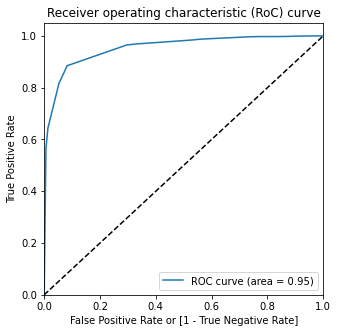

In [167]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Area under ROC curve is 0.94

## Finding Optimal Cutoff Point

In [168]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.033585,5310,0,1,0,0,0,0,0,0,0,0,0
1,0,0.047433,2181,0,1,0,0,0,0,0,0,0,0,0
2,0,0.065011,8215,0,1,0,0,0,0,0,0,0,0,0
3,0,0.184576,8887,0,1,1,0,0,0,0,0,0,0,0
4,0,0.184576,7920,0,1,1,0,0,0,0,0,0,0,0
5,1,0.976312,4947,1,1,1,1,1,1,1,1,1,1,1
6,1,0.976312,3073,1,1,1,1,1,1,1,1,1,1,1
7,1,0.976312,2722,1,1,1,1,1,1,1,1,1,1,1
8,0,0.000501,499,0,1,0,0,0,0,0,0,0,0,0
9,1,0.514277,8330,1,1,1,1,1,1,1,0,0,0,0


In [169]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394598  1.000000  0.000000
0.1   0.1  0.804253  0.965382  0.699231
0.2   0.2  0.904998  0.885130  0.917949
0.3   0.3  0.904998  0.885130  0.917949
0.4   0.4  0.904998  0.885130  0.917949
0.5   0.5  0.904688  0.884343  0.917949
0.6   0.6  0.895219  0.813926  0.948205
0.7   0.7  0.895219  0.813926  0.948205
0.8   0.8  0.851288  0.643194  0.986923
0.9   0.9  0.851288  0.643194  0.986923


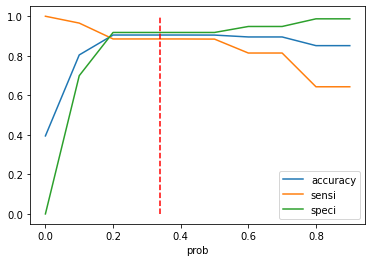

In [170]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.34, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [171]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.033585,5310,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.047433,2181,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.065011,8215,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.184576,8887,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.184576,7920,0,1,1,0,0,0,0,0,0,0,0,0


In [172]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9049984476870537

In [173]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3580,  320],
       [ 292, 2250]], dtype=int64)

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8851298190401259

In [176]:
# Let us calculate specificity
TN / float(TN+FP)

0.9179487179487179

In [177]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08205128205128205


In [178]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8754863813229572


In [179]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9245867768595041


# Making predictions on the test set

In [180]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
2400,0,0,0.278371,0.846232,0.968356,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
849,0,0,2.443279,-0.781935,0.406300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7459,0,0,-0.443265,-0.663688,-0.155756,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6184,1,0,-0.082447,0.060346,0.406300,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4869,0,0,-0.443265,1.497498,-0.155756,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [181]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Notable Activity_Modified,What is your current occupation_Other_Occupation,Lead Quality_Worst,Tags_Already a student,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
2400,0,0,0,0,0,0,0,0,0,0,1,0,0,0
849,0,1,1,0,0,0,0,0,0,0,0,0,0,0
7459,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6184,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4869,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [182]:
# adding constant for statsmodel
X_test_sm = sm.add_constant(X_test)

In [183]:
# making prediction on the test set
y_test_pred = res.predict(X_test_sm)

In [184]:
y_test_pred[:10]

2400    0.976312
849     0.065011
7459    0.036311
6184    0.069157
4869    0.976312
2519    0.976312
5419    0.033585
2103    0.976312
3987    0.065011
3512    0.000379
dtype: float64

In [185]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_test_pred)

In [186]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [187]:
y_test_df.head()

,Converted
2400,1
849,0
7459,0
6184,1
4869,1


In [188]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index
y_test_df.head()

,Converted,LeadID
2400,1,2400
849,0,849
7459,0,7459
6184,1,6184
4869,1,4869


In [189]:
# concatenating both the prediction and the orginal labels
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [190]:
y_pred_final.head()

,Converted,LeadID,0
2400,1,2400,0.976312
849,0,849,0.065011
7459,0,7459,0.036311
6184,1,6184,0.069157
4869,1,4869,0.976312


In [191]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [192]:
# Rearranging the columns
y_pred_final = y_pred_final[['LeadID','Converted','Conversion_Prob']]

In [193]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
2400,2400,1,0.976312
849,849,0,0.065011
7459,7459,0,0.036311
6184,6184,1,0.069157
4869,4869,1,0.976312


In [194]:
y_pred_final['Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [195]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted)
accuracy_score

0.9145546705286025

In [196]:
confusion_test_set = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted)
print(confusion_test_set)

[[1652  120]
 [ 116  874]]


In [197]:
TP = confusion_test_set[1,1] # true positive 
TN = confusion_test_set[0,0] # true negatives
FP = confusion_test_set[0,1] # false positives
FN = confusion_test_set[1,0] # false negatives

## Sensitivity

In [198]:
# Let us calculate specificity
TP / float(TP+FN)

0.8828282828282829

## Specificity

In [199]:
# Let us calculate specificity
TN / float(TN+FP)

0.9322799097065463

### False positive rate

In [200]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.06772009029345373


### Positive Predicted Value

In [201]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8792756539235412


### Negative predictive value

In [202]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9343891402714932


### precision

In [203]:
#precision
confusion_test_set[1,1]/(confusion_test_set[0,1]+confusion_test_set[1,1])

0.8792756539235412

### recall

In [204]:
#recall
confusion_test_set[1,1]/(confusion_test_set[1,0]+confusion_test_set[1,1])

0.8828282828282829

### Classification Report

In [205]:
from sklearn.metrics import classification_report

In [206]:
print(classification_report(y_pred_final.Converted, y_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1772
           1       0.88      0.88      0.88       990

    accuracy                           0.91      2762
   macro avg       0.91      0.91      0.91      2762
weighted avg       0.91      0.91      0.91      2762



#### Precision recall curve

In [207]:
from sklearn.metrics import precision_recall_curve

In [208]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

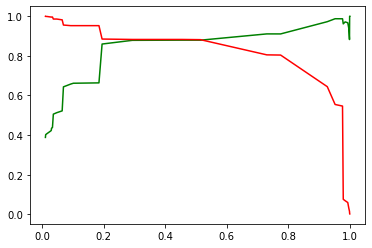

In [209]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Plotting the ROC Curve for Test Dataset

In [210]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds


In [211]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False)

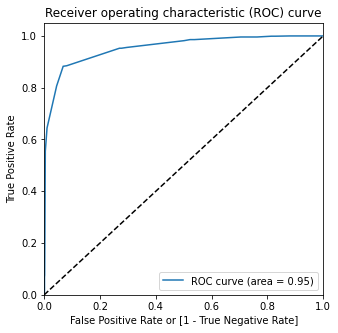

(array([0.        , 0.        , 0.        , 0.00112867, 0.00112867,
        0.00112867, 0.00112867, 0.001693  , 0.00395034, 0.00395034,
        0.01015801, 0.04401806, 0.04401806, 0.06772009, 0.06772009,
        0.06828442, 0.08069977, 0.26975169, 0.27200903, 0.27708804,
        0.29571106, 0.501693  , 0.52257336, 0.53837472, 0.70485327,
        0.71331828, 0.72404063, 0.75564334, 0.76297968, 0.81433409,
        0.82957111, 0.88036117, 0.88826185, 0.89277652, 0.89559819,
        0.89616253, 0.89954853, 0.9023702 , 0.90857788, 0.93679458,
        0.94074492, 0.9469526 , 0.9503386 , 0.96388262, 0.98984199,
        0.99040632, 0.99097065, 0.99548533, 0.99943567, 1.        ]),
 array([0.        , 0.0020202 , 0.00505051, 0.01515152, 0.03131313,
        0.05959596, 0.06868687, 0.07575758, 0.54646465, 0.55454545,
        0.64444444, 0.8040404 , 0.80505051, 0.88181818, 0.88282828,
        0.88282828, 0.88484848, 0.95252525, 0.95252525, 0.95252525,
        0.95555556, 0.98181818, 0.98585859, 0.

In [212]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

### Area under the ROC curve is around 0.95 which means our model seems to be doing well on the test set as well

In [213]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Predicted
2400,2400,1,0.976312,1
849,849,0,0.065011,0
7459,7459,0,0.036311,0
6184,6184,1,0.069157,0
4869,4869,1,0.976312,1


In [214]:
y_pred_final['Lead Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Predicted,Lead Score
2400,2400,1,0.976312,1,97.631152
849,849,0,0.065011,0,6.501129
7459,7459,0,0.036311,0,3.631148
6184,6184,1,0.069157,0,6.915658
4869,4869,1,0.976312,1,97.631152


In [215]:
y_pred_final = pd.merge(df[['Lead Number']], y_pred_final,how='inner',left_index=True, right_index=True)

In [216]:
y_pred_final.head()  # test dataset with all the Lead Score values

,Lead Number,LeadID,Converted,Conversion_Prob,Predicted,Lead Score
0,660737,0,0,0.015066,0,1.506563
3,660719,3,0,0.010562,0,1.056247
10,660608,10,1,0.976312,1,97.631152
12,660562,12,1,0.926795,1,92.679496
13,660558,13,0,0.033585,0,3.358531


In [217]:
y_train_pred_df = y_train_pred_final[['Converted', 'Conversion_Prob', 'LeadID','Predicted']]
y_train_pred_df.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,0,0.033585,5310,0
1,0,0.047433,2181,0
2,0,0.065011,8215,0
3,0,0.184576,8887,0
4,0,0.184576,7920,0


In [218]:
y_train_pred_df = pd.merge(df[['Lead Number']], y_train_pred_df,how='inner',left_index=True, right_index=True)
y_train_pred_df.head()

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted
0,660737,0,0.033585,5310,0
1,660728,0,0.047433,2181,0
2,660727,0,0.065011,8215,0
3,660719,0,0.184576,8887,0
4,660681,0,0.184576,7920,0


In [219]:
y_train_pred_df['Lead Score'] = y_train_pred_df['Conversion_Prob']*100

In [220]:
y_train_pred_df.head()     # train dataset with all the Lead Score values

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted,Lead Score
0,660737,0,0.033585,5310,0,3.358531
1,660728,0,0.047433,2181,0,4.743338
2,660727,0,0.065011,8215,0,6.501129
3,660719,0,0.184576,8887,0,18.457575
4,660681,0,0.184576,7920,0,18.457575


### Final dataframe with all the Lead Scores

In [221]:
final_df_lead_score = pd.concat([y_train_pred_df,y_pred_final],axis=0)
final_df_lead_score.head()

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted,Lead Score
0,660737,0,0.033585,5310,0,3.358531
1,660728,0,0.047433,2181,0,4.743338
2,660727,0,0.065011,8215,0,6.501129
3,660719,0,0.184576,8887,0,18.457575
4,660681,0,0.184576,7920,0,18.457575


In [222]:
final_df_lead_score = final_df_lead_score.set_index('LeadID')

final_df_lead_score = final_df_lead_score[['Lead Number','Converted','Conversion_Prob','Predicted','Lead Score']]

## Final dataframe with the Lead Scores for all the LeadID

In [223]:
final_df_lead_score.head()  # final dataframe with all the Lead Scores

,Lead Number,Converted,Conversion_Prob,Predicted,Lead Score
LeadID,,,,,
5310,660737,0,0.033585,0,3.358531
2181,660728,0,0.047433,0,4.743338
8215,660727,0,0.065011,0,6.501129
8887,660719,0,0.184576,0,18.457575
7920,660681,0,0.184576,0,18.457575


In [224]:
final_df_lead_score.shape

(9177, 5)

In [225]:
# coefficients of our final model 

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                         3.77
Last Notable Activity_Modified                      -1.18
What is your current occupation_Other_Occupation    -2.72
Lead Quality_Worst                                  -3.42
Tags_Already a student                              -4.52
Tags_Interested  in full time MBA                   -3.52
Tags_Interested in other courses                    -4.24
Tags_Lost to EINS                                    5.66
Tags_Other_Tags                                     -2.66
Tags_Ringing                                        -4.60
Tags_Will revert after reading the email             2.48
Tags_invalid number                                 -4.76
Tags_switched off                                   -4.73
Tags_wrong number given                            -24.26
dtype: float64

In [226]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                         66.65
Last Notable Activity_Modified                      -20.86
What is your current occupation_Other_Occupation    -48.13
Lead Quality_Worst                                  -60.43
Tags_Already a student                              -79.82
Tags_Interested  in full time MBA                   -62.17
Tags_Interested in other courses                    -74.89
Tags_Lost to EINS                                   100.00
Tags_Other_Tags                                     -46.96
Tags_Ringing                                        -81.25
Tags_Will revert after reading the email             43.86
Tags_invalid number                                 -84.21
Tags_switched off                                   -83.56
Tags_wrong number given                            -428.82
dtype: float64

In [227]:
# Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')

In [228]:
feature_importance_df = pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
feature_importance_df = feature_importance_df.rename(columns={'index':'Variables', 0:'Relative coeffient value'})
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df.head(3)


,Variables,Relative coeffient value
0,Tags_Lost to EINS,100.00
1,Lead Source_Welingak Website,66.65
2,Tags_Will revert after reading the email,43.86


#### The Top 3 variables are:

    Tags_Lost to EINS	

    Lead Source_Welingak Website

    Tags_Will revert after reading the email